# Lab 7: Programación lineal

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
import pandas as pd

## 1)

Un agricultor debe comprar fertilizantes (abono) para sus campos. El ingeniero agrónomo le dijo que cada kilogramo de fertilizante le alcanza para 10m2 de su campo, y debido a las características propias de esas tierras, el fertilizante debe contener (al menos):

3g de fósforo (P), 1.5g de nitrógeno (N) y 4g de potasio (K) por cada 10m . En el mercado
existen 2 tipos de fertilizantes: T1 y T2. El fertilizante T1 contiene 3g de P, 1g de N y 8g de K y cuesta 10 por kilogramo. En cambio, el fertilizante T2 contiene 2g de P, 3g de N y 2 g de K y cuesta 8 por kilogramo. El agricultor desea saber cuántos kilogramos de cada fertilizante debe comprar, por cada 10m2 de campo, de modo de minimizar el costo total cubriendo los requerimientos de su suelo. Graficar la región factible para el problema.

Comenzamos definiendo una tabla donde podremos resumir esta información:

In [11]:
df = pd.DataFrame(
    columns=['Tipo 1 (x1)', 'Tipo 2 (x2)', 'Necesidades mínimas'],
    index=['P', 'N', 'K', 'Costo']
)

df.loc['P'] = [3, 2, 3]
df.loc['N'] = [1, 3, 1.5]
df.loc['K'] = [8, 2, 4]
df.loc['Costo'] = [10, 8, '-']

df

,Tipo 1 (x1),Tipo 2 (x2),Necesidades mínimas
P,3,2,3
N,1,3,1.5
K,8,2,4
Costo,10,8,-


Podemos formular el problema de la siguiente forma:

Minimizar 
$$ C^T x $$
sujeto a: 
$$ Ax \geq b $$
$$ x \geq 0 $$

donde $ c = (10, 8), x = (x_1, x_2) $  y:

$$
A = 
\left( \begin{array}{cc}
3 & 2 \\
1 & 3 \\
8 & 2 \\
\end{array}\right)
b = 
\left(\begin{array}{cc}
3 \\
1.5 \\
4 \\
\end{array}\right)
$$

Para graficar la región factible, necesitamos encontrar los valores posibles de $ x $ que satifacen las restricciones. Esta es la región que debemos minimizar (i.e. optimizar) para encontrar la solución.

Esto quiere decir, todos los $ x $ que satisfacen: $ Ax \geq b $ con $ x \geq 0 $.

Se puede reducir a las siguientes condiciones de $ y $:

$$ y \geq {(3 - 3x) \over 2} $$
$$ y \geq {(1.5 - x) \over 3} $$
$$ y \geq {(4 - 8x) \over 2} $$

Luego, construimos un espacio de $ x $ y sobre este espacio buscamos los y que satisfacen **todas** las condiciones anteriores:

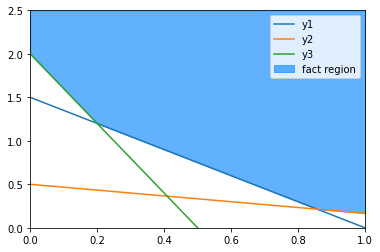

In [25]:
# build x space
x = np.linspace(0, 1)

# contruir las líneas de las condiciones de y
y1 = (3 - 3*x)*(1/2)
y2 = (1.5 - x)*(1/3)
y3 = (4 - 8*x)*(1/2)

# graficar las condiciones de y
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')

# graficar el espacio que cumple con todas las condiciones
plt.fill_between(x, np.maximum.reduce([y1, y2, y3]),2.5,
                 alpha=0.7, color='dodgerblue', label='fact region')

# seteamos límites para mostrar el gráfico 
plt.ylim(0, 2.5)
plt.xlim(0, 1)
plt.legend()

plt.show()